# Download Required Packages

In [1]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parse Dataset

In [41]:
data = np.genfromtxt('./Housing.csv', delimiter=',', dtype='longlong', encoding='utf-8')
data = np.delete(data, 0, 0)
print(data)

[[     0     -1 787500 ...   1974      4   1895]
 [     0     -1 149900 ...   1995      4   1192]
 [     0     -1 299900 ...   1995      4   2110]
 ...
 [    30     -1 895000 ...   1984      6   3388]
 [    26     -1 339000 ...   1955      6   1280]
 [    80     -1 565000 ...   1960     -1   1359]]


# Plot Sqft Area vs Price

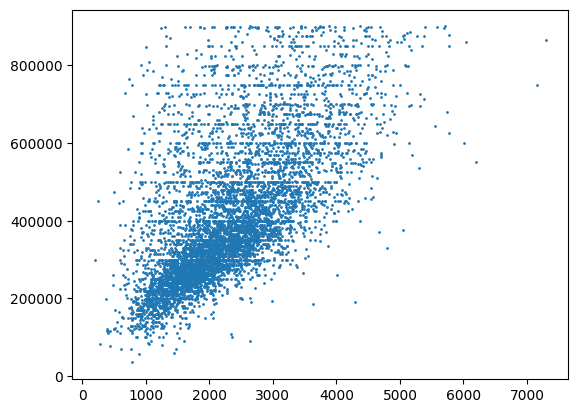

In [42]:
# plt.xlim([0,5000])
# plt.ylim([0,800_000])
plt.scatter(data[:, 4], data[:, 2], s=1)

# Run 2D Gradient Descent Algo

[0/20]: x0 = 0.07235047879789744 x1=171.80199419421498


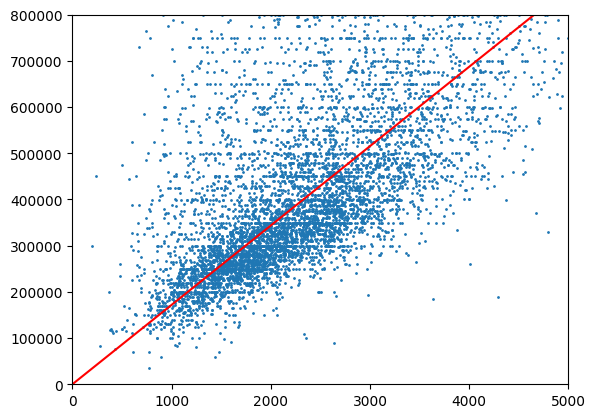

[1/20]: x0 = 0.08342138350991625 x1=175.25659417661032


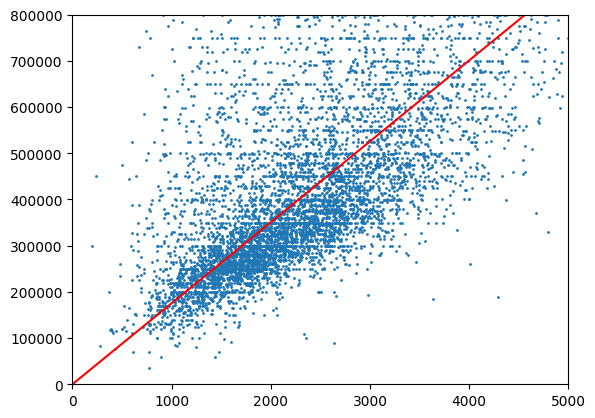

[2/20]: x0 = 0.09326007446892234 x1=175.32605575501069


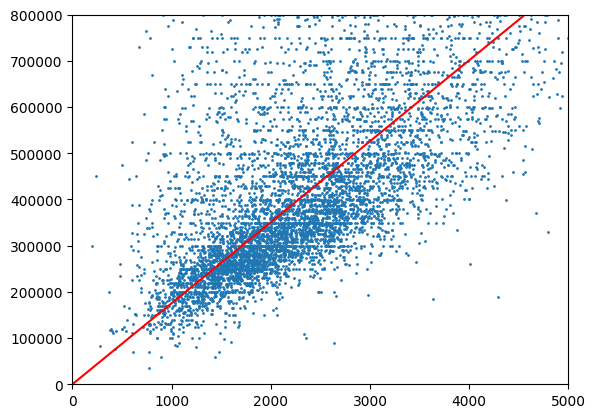

[3/20]: x0 = 0.10307398720709568 x1=175.32744878938874


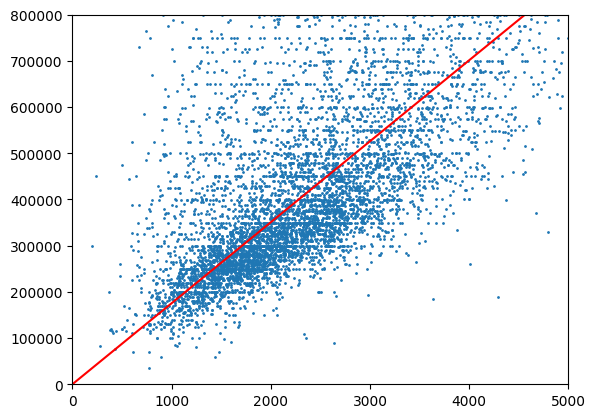

[4/20]: x0 = 0.11288740090267695 x1=175.3274730978433


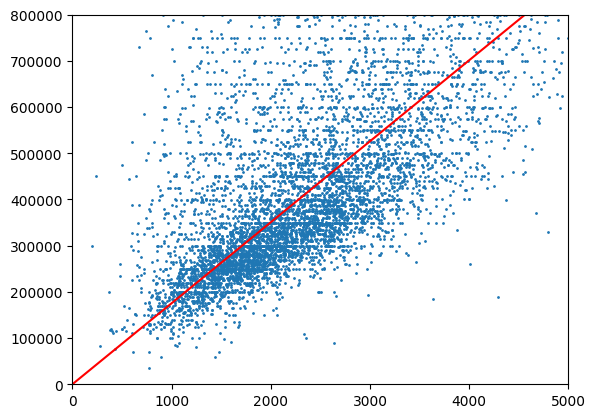

[5/20]: x0 = 0.12270080376268046 x1=175.32746988388436


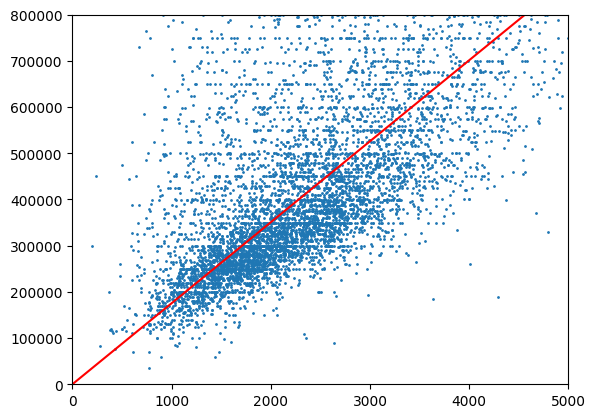

[6/20]: x0 = 0.132514205603999 x1=175.3274661165042


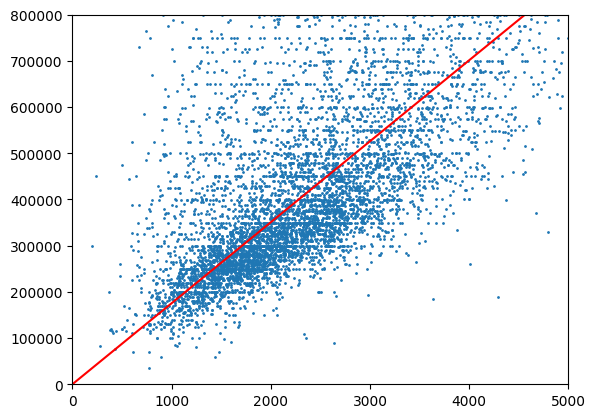

[7/20]: x0 = 0.1423276066240303 x1=175.32746233799543


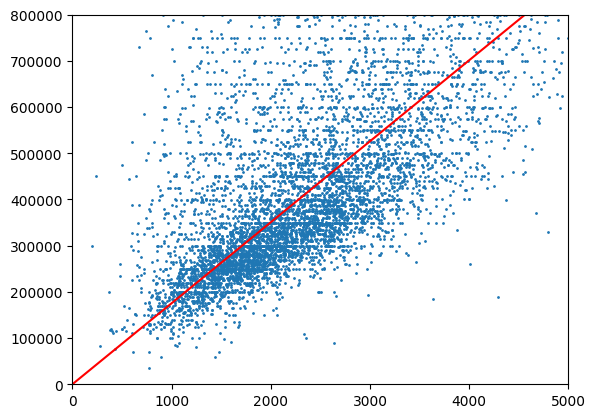

[8/20]: x0 = 0.15214100682674525 x1=175.32745855926348


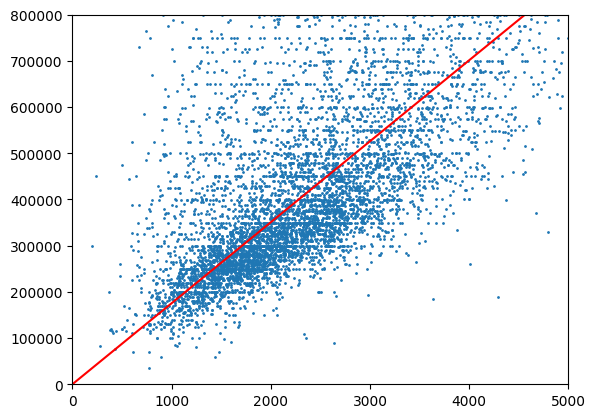

[9/20]: x0 = 0.16195440621222226 x1=175.32745478052792


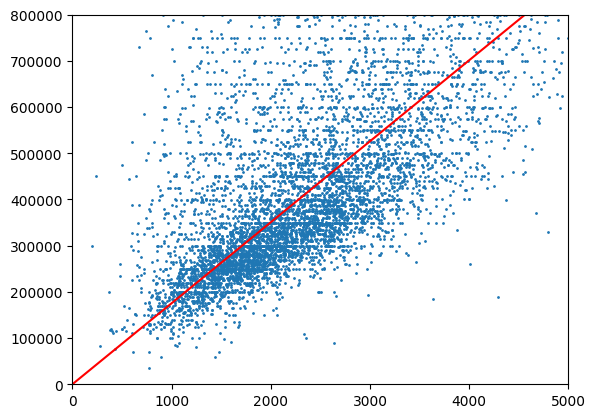

[10/20]: x0 = 0.1717678047804638 x1=175.32745100179184


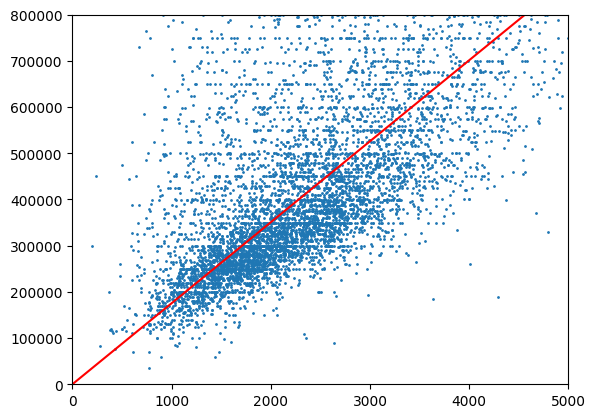

[11/20]: x0 = 0.18158120253146942 x1=175.3274472230562


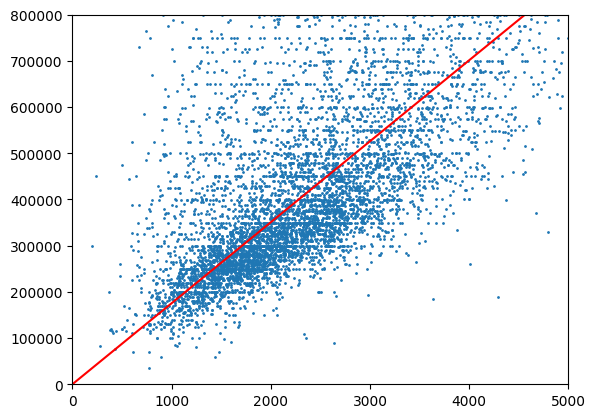

[12/20]: x0 = 0.19139459946523985 x1=175.32744344432123


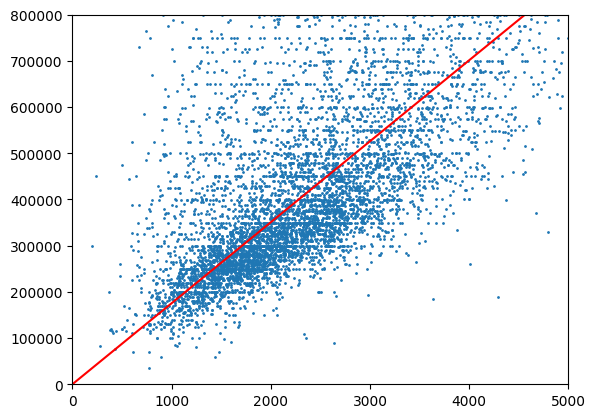

[13/20]: x0 = 0.20120799558177493 x1=175.32743966558553


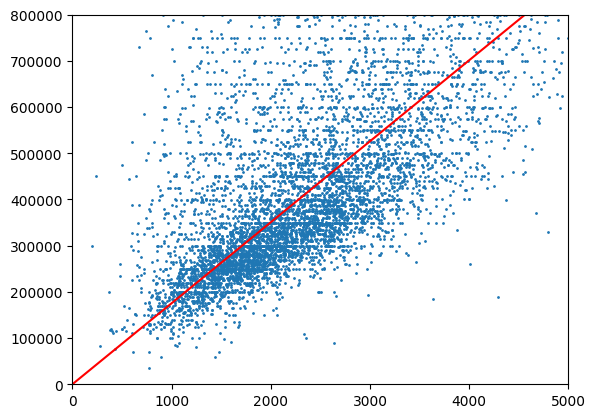

[14/20]: x0 = 0.21102139088107502 x1=175.3274358868509


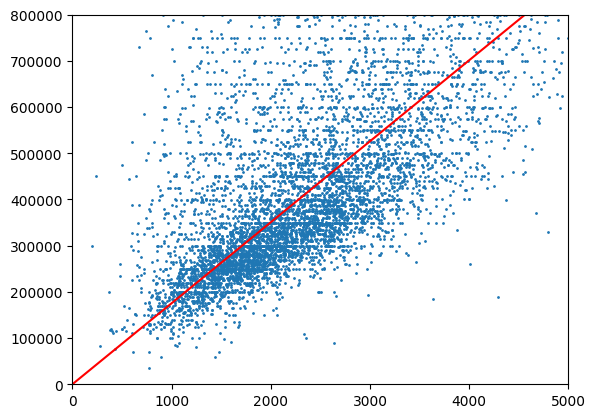

[15/20]: x0 = 0.22083478536313908 x1=175.32743210811694


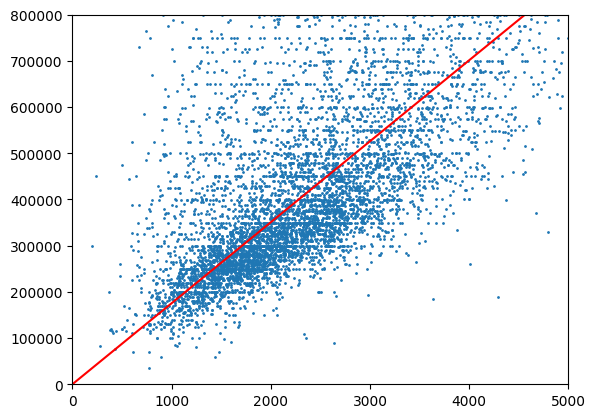

[16/20]: x0 = 0.23064817902796936 x1=175.3274283293825


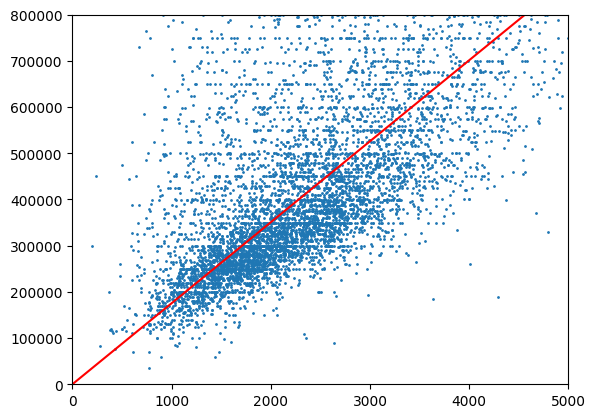

[17/20]: x0 = 0.240461571875565 x1=175.32742455064917


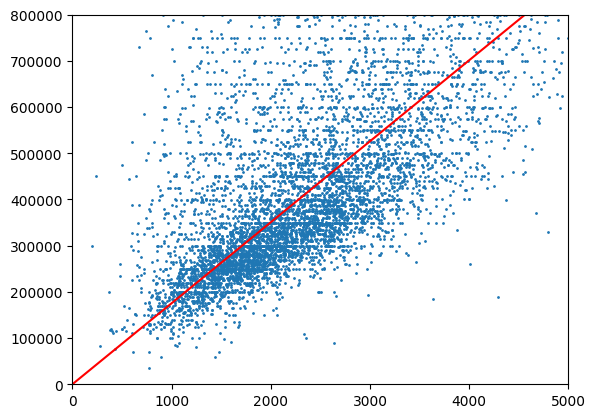

[18/20]: x0 = 0.25027496390592363 x1=175.32742077191557


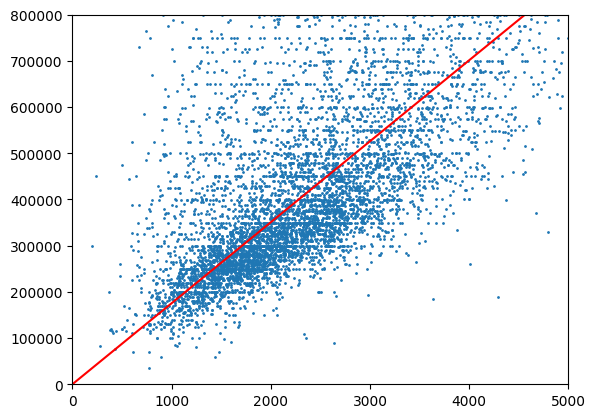

[19/20]: x0 = 0.26008835511904643 x1=175.3274169931824


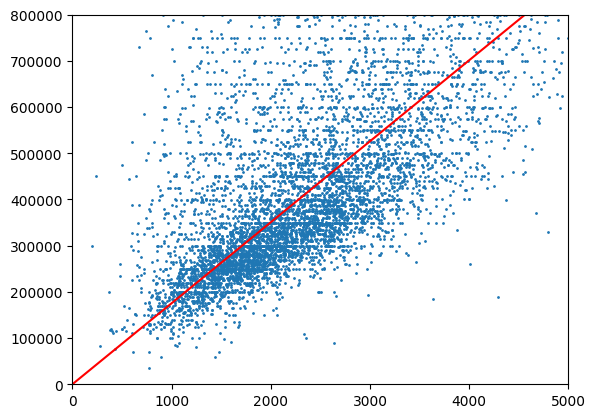

array([[  0.26008836],
       [175.32741699]])

In [44]:
placeholder_x = np.arange(np.amax(data[:, 4]))

def sgd(data, training_rate=0.0000000001, iters=20):
    theta = np.array([[0],[0]])
    X = data[:, [4]]
    X_1 = np.ones(X.shape, dtype=X.dtype)
    X = np.hstack((X_1, X))
    Y = data[:, [2]].T[0]

    for _ in range(iters):
        for x, y in zip(X, Y):
            h_x = np.matmul(theta.T, x)
            x = np.reshape(x, theta.shape)
            theta = theta - training_rate * (h_x - y) * x

        print(f'[{_}/{iters}]: x0 = {theta[0,0]} x1={theta[1,0]}')
        # plot charts
        plt.xlim([0,5000])
        plt.ylim([0,800_000])
        plt.scatter(data[:, 4], data[:, 2], s=1)
        plt.plot(placeholder_x, theta[1,0]*placeholder_x + theta[0,0], color='red')
        plt.show()

    return theta


sgd(data)
